# run Omicron for O4a data
- `omicron 1368964818  1368965818 ini2.txt`

- ERROR MESSAGE 
    - `ffl::ExtractChannels: the requested GPS time is not covered by the ffl`


# What I understood
- From comparing between new H5 and old H5
  - the number of triggers reduced: 1195 -> 1145
- Comparing between new H5 and old xml
  - the number of triggers reduced: 1195 -> 1145
- Comparing between old H5 and old xml
  - the number of triggers reduced is the same: 1145
 
- Note that the read triggers are not sorted by the start time of triggers. Initially, we thought the first part of the triggers was missed for some reason. But It was the unsorted list.

```
Otile::SaveTriggers: Saving triggers for K1:CAL-CS_PROC_DARM_STRAIN_DBL_DQ in 1368965720.00000-1368965780.00000
Triggers::SortTriggers: sorting triggers
Triggers::Clusterize: cluster 2012 triggers...
Triggers::Clusterize: 69 clusters were found
MakeTriggers::Reset: reset all
Omicron::NewChannel: load a new channel...
Omicron::NewChunk: call a new chunk...
Omicron::NewChannel: load a new channel...
Omicron::LoadData: load data vector...
Omicron::Condition: condition data vector...
Sample::Transform: remove DC component...
Sample::Transform: highpass input data...
Sample::HighPass: apply filters
Sample::Transform: resample input data...
Sample::Resample: apply anti-aliasing filters
Sample::Resample: decimate time-series
Spectrum::AddData: compute PSD
Spectrum::AddData: compute PSD
Omicron::Project: project data onto the tiles...
Omicron::WriteOutput: write chunk output...
Otile::SaveTriggers: Saving triggers for K1:CAL-CS_PROC_DARM_STRAIN_DBL_DQ in 1368965780.00000-1368965816.00000
Triggers::SortTriggers: sorting triggers
Triggers::Clusterize: cluster 1786 triggers...
Triggers::Clusterize: 60 clusters were found
MakeTriggers::Reset: reset all
Omicron::NewChannel: load a new channel...
Omicron::NewChunk: call a new chunk...
Otile::NewChunk: end of segments
```

In [32]:
from gwpy.table import EventTable
import glob
from matplotlib import pyplot as plt
%matplotlib inline

In [33]:
xmls_new = glob.glob("./psd128/K1:CAL-CS_PROC_DARM_STRAIN_DBL_DQ_h5_new/*.h5")
xmls_old = glob.glob("./psd128/K1:CAL-CS_PROC_DARM_STRAIN_DBL_DQ_h5_old/*.h5")

events_new = EventTable.read(xmls_new, 'triggers')
events_new.keys()

events_old = EventTable.read(xmls_old, 'triggers')
events_old.keys()

events_new['duration']  = events_new['tend'] - events_new['tstart']
events_new['bandwidth'] = events_new['fend'] - events_new['fstart']

events_old['duration']  = events_old['tend'] - events_old['tstart']
events_old['bandwidth'] = events_old['fend'] - events_old['fstart']

In [39]:
print(events_new[0], events_old[0])
print("")
print("")
print(events_new[-1], events_old[-1])

       time           frequency            tstart             tend             fstart              fend              snr                q               amplitude               phase               duration           bandwidth     
----------------- ------------------ ----------------- ----------------- ------------------ ----------------- ------------------ ---------------- ---------------------- ------------------- --------------------- ------------------
1368965360.111572 496.50002887960665 1368965360.110839 1368965360.111817 455.23137143295577 911.4418031821492 5.8448593195710785 5.65685424949238 1.4040569505167582e-21 -1.2073103924526873 0.0009779930114746094 456.21043174919345        time           frequency           tstart             tend             fstart              fend              snr               q               amplitude               phase               duration           bandwidth     
----------------- ----------------- ----------------- ----------------- ----------

In [38]:
print(events_new, events_old)

       time           frequency      ...     bandwidth     
----------------- ------------------ ... ------------------
1368965360.111572 496.50002887960665 ... 456.21043174919345
1368965360.453125 131.27251805058432 ...  3.001499946041548
1368965360.902343 364.58260945512677 ... 16.465861624173897
1368965364.219238 3884.4115620227117 ... 44.155456284579486
1368965366.249511  3445.899182347949 ...  78.18484803851925
1368965366.692871  2565.699197757574 ... 58.213775642891505
1368965368.851562  361.0310402213304 ...  559.0583186796948
1368965369.223877  702.5345031918218 ... 267.30136659713264
1368965371.551025  590.6000348151526 ...   102.630571169787
1368965372.270874  1182.470265607872 ...  645.5257812231936
              ...                ... ...                ...
1368965045.565307 1673.1643751613274 ...  290.7514482918907
1368965046.044189 496.50002887960665 ...  188.9090651520608
1368965047.654541  835.6835406036739 ... 267.30136659713264
1368965048.566406 168.80422565735836 ...

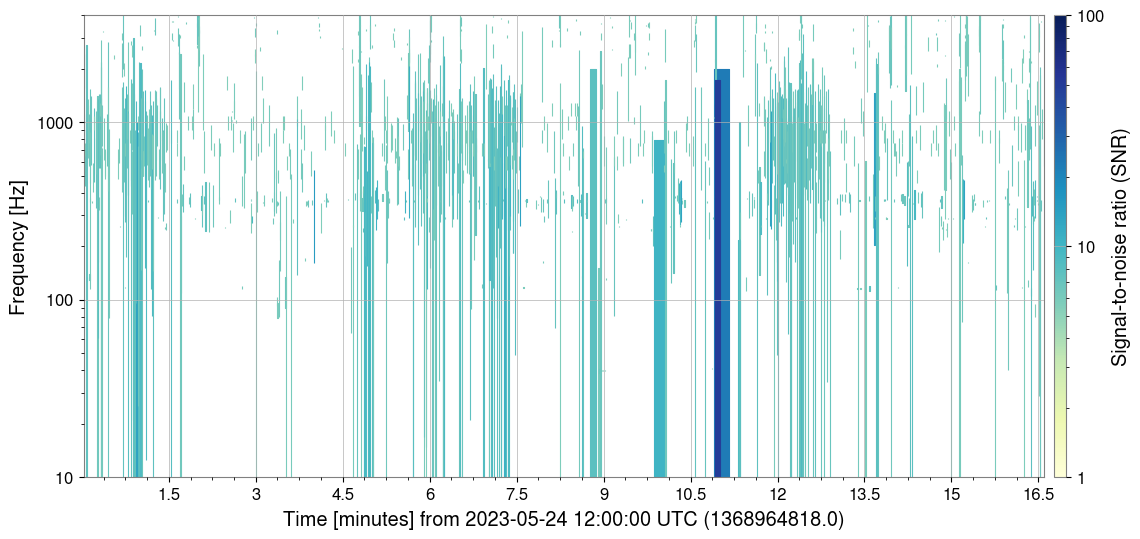

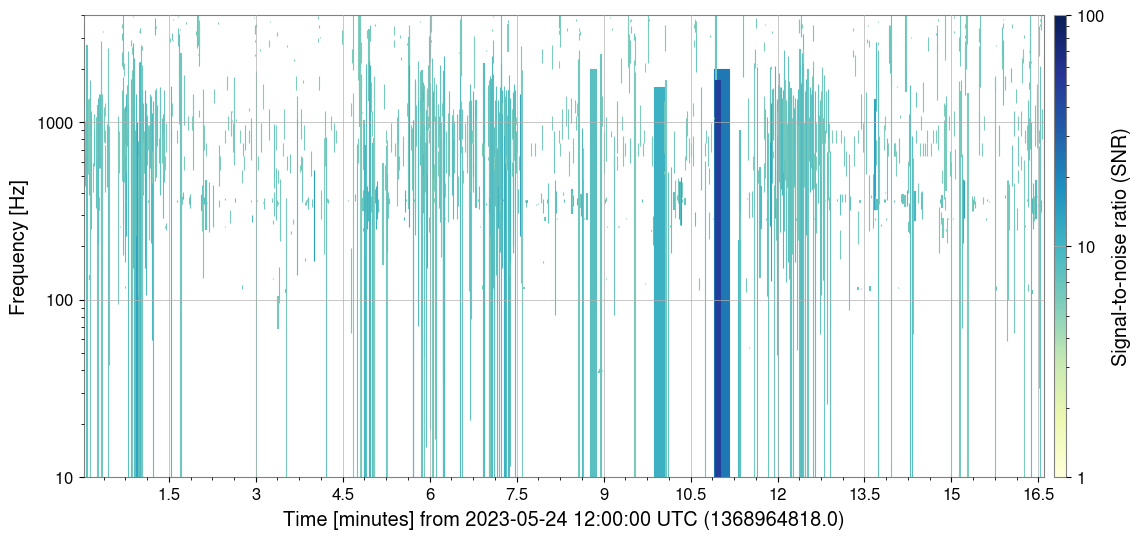

In [71]:
plot = events_new.tile('time', 'frequency', 'duration', 'bandwidth', color='snr')
ax = plot.gca()
#ax.set_epoch('1368964818')
ax.set_yscale('log')
ax.set_ylim(10, 4000)
ax.set_ylabel('Frequency [Hz]')
ax.colorbar(clim=[1, 100], cmap='YlGnBu', norm='log', label='Signal-to-noise ratio (SNR)')

plot = events_old.tile('time', 'frequency', 'duration', 'bandwidth', color='snr')
ax = plot.gca()
#ax.set_epoch('1368964818')
ax.set_yscale('log')
ax.set_ylim(10, 4000)
ax.set_ylabel('Frequency [Hz]')
ax.colorbar(clim=[1, 100], cmap='YlGnBu', norm='log', label='Signal-to-noise ratio (SNR)')

In [47]:
xmls_h5 = glob.glob("./K1:CAL-CS_PROC_DARM_STRAIN_DBL_DQ_h5/*.h5")
xmls_h5_old = glob.glob("./K1:CAL-CS_PROC_DARM_STRAIN_DBL_DQ_h5_old/*.h5")
xmls_xml = glob.glob("./K1:CAL-CS_PROC_DARM_STRAIN_DBL_DQ_xml/*.xml")

events_h5 = EventTable.read(xmls_h5, 'triggers')
#events_h5 = EventTable.read(xmls_h5, treename='triggers')
events_h5.keys()

events_h5_old = EventTable.read(xmls_h5_old, 'triggers')

events_xml = EventTable.read(xmls_xml, "sngl_burst")
events_xml.keys()

#events_xml = EventTable.read(xmls_xml, treename='triggers', columns=['time', 'frequency', 'q', 'snr', 'tstart', 'tend', 'fstart', 'fend'])
#events_xml = EventTable.read(xmls_xml, treename='triggers', columns=['time', 'frequency', 'q', 'snr', 'tstart', 'tend', 'fstart', 'fend'])


events_h5['duration']  = events_h5['tend'] - events_h5['tstart']
events_h5['bandwidth'] = events_h5['fend'] - events_h5['fstart']

events_h5_old['duration']  = events_h5_old['tend'] - events_h5_old['tstart']
events_h5_old['bandwidth'] = events_h5_old['fend'] - events_h5_old['fstart']

In [29]:
print(events_h5[0], events_h5_old[0])

       time           frequency            tstart             tend             fstart              fend              snr                q               amplitude               phase               duration           bandwidth    
----------------- ------------------ ----------------- ----------------- ------------------ ----------------- ------------------ ---------------- ---------------------- ------------------- --------------------- -----------------
1368965360.111572 496.50002887960665 1368965360.110839 1368965360.111817 455.23137143295577 644.1404365850166 5.8436801579322895 5.65685424949238 1.4344387433953353e-21 -1.2114575913733299 0.0009779930114746094 188.9090651520608        time           frequency            tstart             tend             fstart              fend             snr               q               amplitude               phase               duration           bandwidth     
----------------- ------------------ ----------------- ----------------- ------------

In [70]:
events_h5_old, events_xml

(<EventTable length=1195>
        time           frequency      ...     bandwidth     
      float64           float64       ...      float64      
 ----------------- ------------------ ... ------------------
 1368965360.111572 496.50002887960665 ... 456.21043174919345
 1368965360.484375 131.91788226807932 ... 1.5024127456633778
 1368965360.902343  361.3170752360974 ...  36.36079582005874
 1368965368.673095  590.6000348151526 ...   102.630571169787
 1368965368.851562  363.5057576881133 ...  562.2601209838176
 1368965369.223877  702.5345031918218 ... 267.30136659713264
 1368965371.551025  590.6000348151526 ...   102.630571169787
 1368965372.270874  994.0678740517436 ... 378.22441462606093
 1368965373.492187 258.30136548019806 ... 2.9417942211281343
               ...                ... ...                ...
 1368965046.044189 496.50002887960665 ... 278.59261879917216
 1368965047.654541  835.6835406036739 ... 267.30136659713264
 1368965048.566406 168.80422565735836 ...  7.63371953735759

In [67]:
events_h5[0]

<Row index=0>
       time           frequency            tstart             tend             fstart              fend              snr                q               amplitude               phase               duration           bandwidth    
     float64           float64            float64           float64           float64            float64           float64           float64             float64               float64              float64             float64     
----------------- ------------------ ----------------- ----------------- ------------------ ----------------- ------------------ ---------------- ---------------------- ------------------- --------------------- -----------------
1368965360.111572 496.50002887960665 1368965360.110839 1368965360.111817 455.23137143295577 644.1404365850166 5.8436801579322895 5.65685424949238 1.4344387433953353e-21 -1.2114575913733299 0.0009779930114746094 188.9090651520608

In [31]:
print(events_h5, events_h5_old)

       time           frequency      ...     bandwidth     
----------------- ------------------ ... ------------------
1368965360.111572 496.50002887960665 ...  188.9090651520608
1368965360.453125 131.27251805058432 ...  3.001499946041548
1368965360.902343 364.58260945512677 ...  38.74705139343399
1368965366.692871  2565.699197757574 ... 58.213775642891505
1368965368.851562  361.0310402213304 ...  559.0583186796948
1368965369.223877  702.5345031918218 ... 122.08180338429213
1368965371.551025  590.6000348151526 ...   102.630571169787
1368965372.270874  1182.470265607872 ... 378.22441462606093
1368965373.289062 287.61368595628875 ...  3.269404730758481
1368965373.476562  259.6443043763324 ...  2.951467049351379
              ...                ... ...                ...
1368965046.044189 496.50002887960665 ... 278.59261879917216
1368965047.654541  835.6835406036739 ... 267.30136659713264
1368965048.566406 168.80422565735836 ...  7.633719537357592
1368965049.226562  352.9157521255695 ...

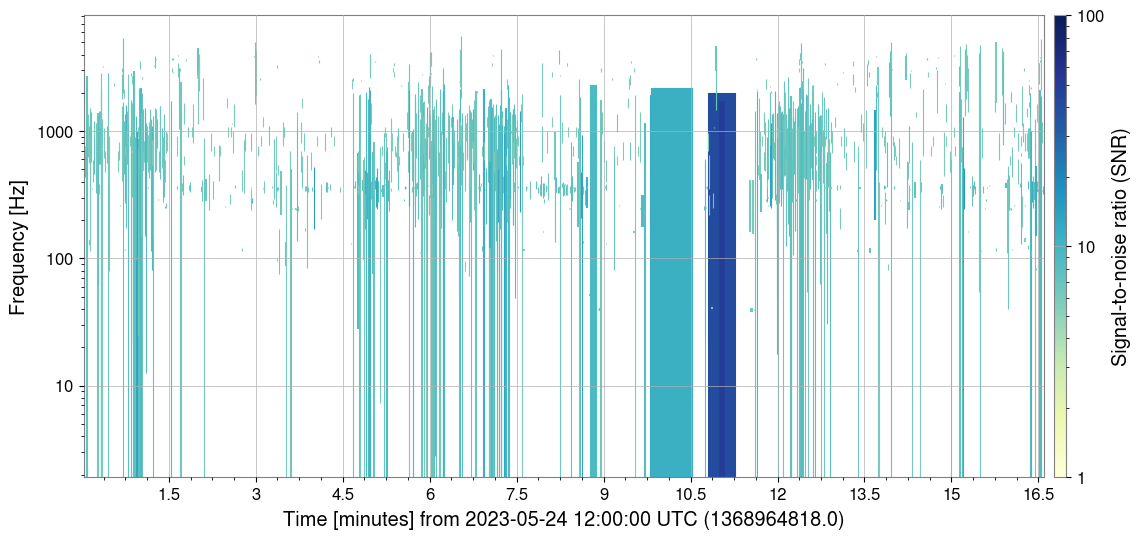

In [19]:
plot = events_h5.tile('time', 'frequency', 'duration', 'bandwidth', color='snr')
ax = plot.gca()
#ax.set_epoch('1368964818')
ax.set_yscale('log')
ax.set_ylabel('Frequency [Hz]')
ax.colorbar(clim=[1, 100], cmap='YlGnBu', norm='log', label='Signal-to-noise ratio (SNR)')

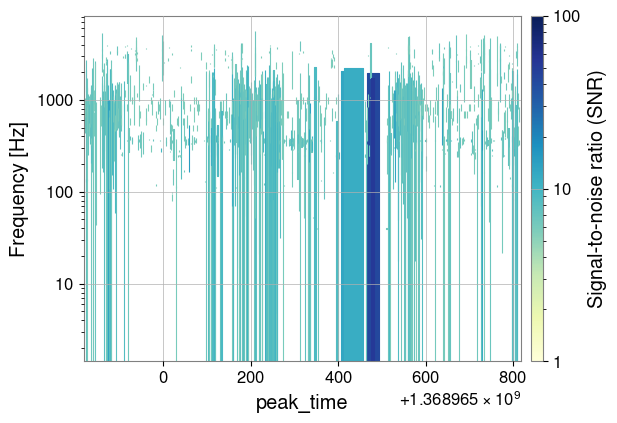

In [48]:
plot = events_xml.tile('peak_time', 'peak_frequency', 'duration', 'bandwidth', color='snr')#, epoch=1368964818)
ax = plot.gca()
#ax.set_epoch(1368964818)
ax.set_xlim(1368964818, 1368965818)
ax.set_yscale('log')
ax.set_ylabel('Frequency [Hz]')
ax.colorbar(clim=[1, 100], cmap='YlGnBu', norm='log', label='Signal-to-noise ratio (SNR)')

In [66]:
print(sorted(events_h5["time"])[0:10])

print(sorted(events_h5_old["time"])[0:10])

[1368964820.184326, 1368964820.443603, 1368964821.161377, 1368964821.641357, 1368964822.102111, 1368964822.819946, 1368964823.234375, 1368964824.279419, 1368964824.517944, 1368964824.976806]
[1368964820.184326, 1368964820.443603, 1368964821.161377, 1368964821.404541, 1368964821.641357, 1368964822.102172, 1368964822.819946, 1368964823.234375, 1368964824.279541, 1368964824.517944]


In [64]:
print(sorted(events_xml["start_time"]))

[1368964820, 1368964820, 1368964821, 1368964821, 1368964821, 1368964822, 1368964822, 1368964823, 1368964824, 1368964824, 1368964824, 1368964825, 1368964825, 1368964825, 1368964826, 1368964826, 1368964826, 1368964827, 1368964827, 1368964829, 1368964830, 1368964830, 1368964832, 1368964832, 1368964832, 1368964833, 1368964833, 1368964834, 1368964835, 1368964835, 1368964835, 1368964836, 1368964836, 1368964837, 1368964837, 1368964837, 1368964838, 1368964838, 1368964838, 1368964839, 1368964840, 1368964841, 1368964841, 1368964842, 1368964842, 1368964844, 1368964844, 1368964844, 1368964845, 1368964855, 1368964856, 1368964857, 1368964859, 1368964859, 1368964859, 1368964859, 1368964860, 1368964860, 1368964861, 1368964862, 1368964862, 1368964862, 1368964862, 1368964863, 1368964863, 1368964863, 1368964863, 1368964864, 1368964865, 1368964865, 1368964865, 1368964865, 1368964866, 1368964868, 1368964868, 1368964868, 1368964869, 1368964869, 1368964869, 1368964870, 1368964870, 1368964870, 1368964870, 136

In [3]:
xmls_42 = glob.glob("./K1:CAL-CS_PROC_DARM_STRAIN_DBL_DQ_v42/*.root")
xmls_31 = glob.glob("./K1:CAL-CS_PROC_DARM_STRAIN_DBL_DQ_v31/*.root")

#events = EventTable.read(xmls, tablename="sngl_burst")
events_31 = EventTable.read(xmls_31, treename='triggers')
events_31.keys()
events_31 = EventTable.read(xmls_31, treename='triggers', columns=['time', 'frequency', 'q', 'snr', 'tstart', 'tend', 'fstart', 'fend'])

events_42 = EventTable.read(xmls_42, treename='triggers', columns=['time', 'frequency', 'q', 'snr', 'tstart', 'tend', 'fstart', 'fend'])

In [8]:
events_31 = EventTable.read('/home/hirotaka.yuzurihara/work/commissioning-tools-for-kagra/script/Omicron/K1:CAL-CS_PROC_DARM_STRAIN_DBL_DQ_v42/K1-CAL_CS_PROC_DARM_STRAIN_DBL_DQ_OMICRON-1368965720-60.root', treename='triggers')

In [9]:
events_31

<EventTable length=2049>
       time           frequency      ...        phase        tstart_us
     float64           float64       ...       float64         int32  
----------------- ------------------ ... ------------------- ---------
1368965720.039062 287.61368595628875 ...  1.0295761343652035     31250
1368965720.054687 287.61368595628875 ...  0.9872070462626903     46875
 1368965720.44934  994.0678740517436 ...  0.6271293136770633    449219
1368965720.449585  994.0678740517436 ...  0.5940942058442861    449463
1368965720.937011 3884.4115620227117 ... -0.9058287503164802    936523
1368965720.937988 3884.4115620227117 ... -0.8759389607100422    937500
1368965720.937988  3928.818696712811 ...  2.4410216119767796    937500
1368965720.938964  3928.818696712811 ...  2.4330500651199447    938477
1368965721.408935  702.5345031918218 ... 0.07841764793611194    408691
              ...                ... ...                 ...       ...
1368965779.905761 1854.4040384196246 ...  0.7577970986648591    905273
1368965779.905517  1940.182117576932 ... -1.4766525428645425    905273
1368965779.906005  1940.182117576932 ...  -1.579575311598676    905762
1368965779.905883 1931.1049902029986 ... -1.8520127562358706    905762
1368965779.906005 1764.9494905337503 ... -1.4112248057510222    905762
1368965779.906128 1931.1049902029986 ... -1.9051043087643182    906006
1368965779.906494  1940.182117576932 ... -1.6510882162079987    906250
1368965779.906372 1931.1049902029986 ... -1.9172386466902993    906250
1368965779.907226 1867.4771971658572 ... -2.8981388571860665    906250
1368965779.906982  1940.182117576932 ...   -1.70233310353162    906738

In [ ]:
events_v42['duration']  = events_v42['tend'] - events_v42['tstart']
events_v42['bandwidth'] = events_v42['fend'] - events_v42['fstart']

events_v31['duration']  = events_v31['tend'] - events_v31['tstart']
events_v31['bandwidth'] = events_v31['fend'] - events_v31['fstart']

In [18]:
events_v42, events_v31

(<EventTable length=75970>
        time           frequency      ...        duration       
      float64           float64       ...        float64        
 ----------------- ------------------ ... ----------------------
 1368965720.039062 287.61368595628875 ...               0.015625
 1368965720.054687 287.61368595628875 ...               0.015625
  1368965720.44934  994.0678740517436 ...  0.0002448558807373047
 1368965720.449585  994.0678740517436 ...         0.000244140625
 1368965720.937011 3884.4115620227117 ...  0.0009770393371582031
 1368965720.937988 3884.4115620227117 ...  0.0009770393371582031
 1368965720.937988  3928.818696712811 ...  0.0009770393371582031
 1368965720.938964  3928.818696712811 ...  0.0009768009185791016
 1368965721.408935  702.5345031918218 ...  0.0004889965057373047
               ...                ... ...                    ...
 1368965593.625244  1028.704529017577 ...  0.0004889965057373047
 1368965593.625244 1125.5486120622675 ...  0.000488996505737304

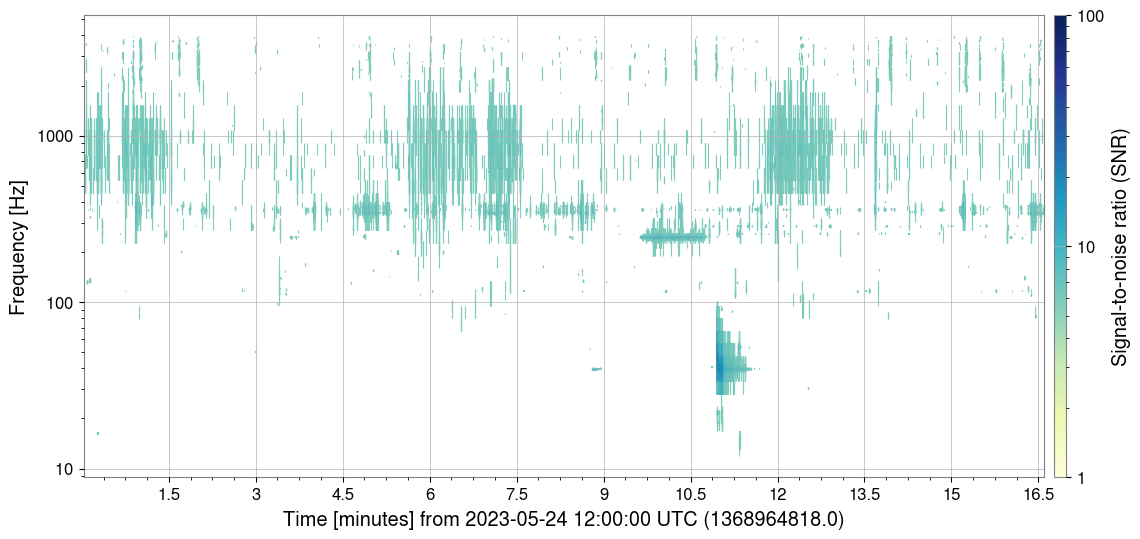

In [15]:
plot = events_v42.tile('time', 'frequency', 'duration', 'bandwidth', color='snr')
ax = plot.gca()
#ax.set_epoch('1368964818')
ax.set_yscale('log')
ax.set_ylabel('Frequency [Hz]')
ax.colorbar(clim=[1, 100], cmap='YlGnBu', norm='log', label='Signal-to-noise ratio (SNR)')

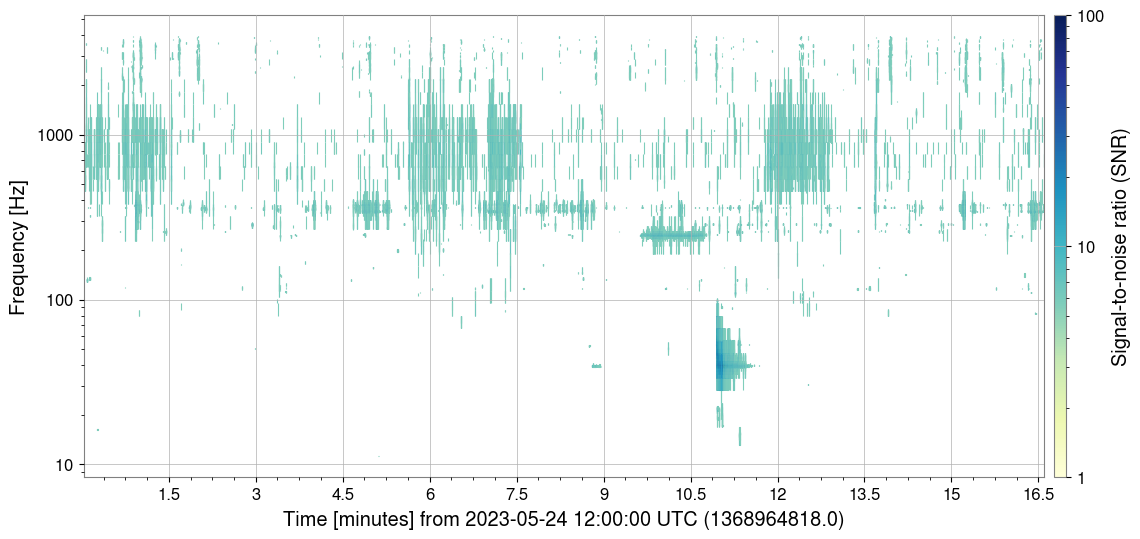

In [17]:
plot = events_v31.tile('time', 'frequency', 'duration', 'bandwidth', color='snr')
ax = plot.gca()
#ax.set_epoch('1368964818')
ax.set_yscale('log')
ax.set_ylabel('Frequency [Hz]')
ax.colorbar(clim=[1, 100], cmap='YlGnBu', norm='log', label='Signal-to-noise ratio (SNR)')

In [10]:
# xmls = glob.glob("./K1:CAL-CS_PROC_DARM_STRAIN_DBL_DQ_128/*.root")

# events128 = EventTable.read(xmls, treename='triggers', columns=['time', 'frequency', 'q', 'snr', 'tstart', 'tend', 'fstart', 'fend'])

TypeError: EventTable.tile() missing 2 required positional arguments: 'w' and 'h'

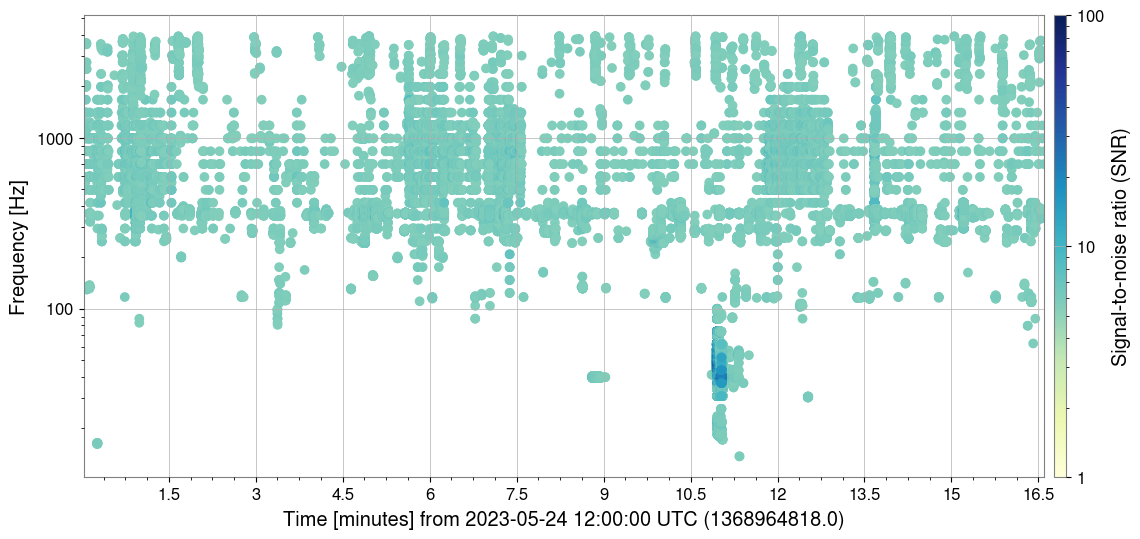

In [11]:
plot = events128.scatter('time', 'frequency', color='snr')
#plot = events.tile('peak_time', 'central_freq', 'duration', 'bandwidth', color='snr')
ax = plot.gca()
#ax.set_epoch('1368964818')
ax.set_yscale('log')
ax.set_ylabel('Frequency [Hz]')
ax.colorbar(clim=[1, 100], cmap='YlGnBu', norm='log', label='Signal-to-noise ratio (SNR)')

plot = events128.tile('time', 'frequency', color='snr')
#plot = events.tile('peak_time', 'central_freq', 'duration', 'bandwidth', color='snr')
ax = plot.gca()
#ax.set_epoch('1368964818')
ax.set_yscale('log')
ax.set_ylabel('Frequency [Hz]')
ax.colorbar(clim=[1, 100], cmap='YlGnBu', norm='log', label='Signal-to-noise ratio (SNR)')

/disk/home/hirotaka.yuzurihara/mambaforge/envs/igwn-py310/lib/python3.10/site-packages/gwpy/plot/plot.py:287: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


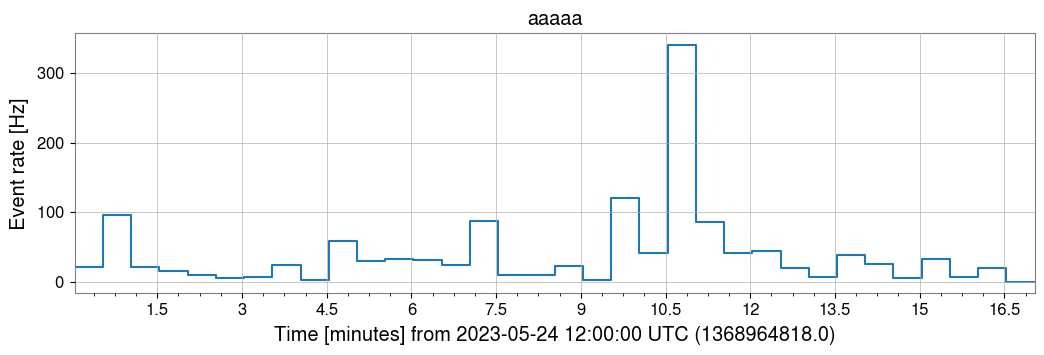

In [15]:
rate = events128.event_rate(30)
plot = rate.step()
ax = plot.gca()
ax.set_ylabel('Event rate [Hz]')
ax.set_title('aaaaa')
plot.show()

In [ ]:
rate = events128.event_rate(30)
plot = rate.step()
ax = plot.gca()
ax.set_ylabel('Event rate [Hz]')
ax.set_title('aaaaa')
plot.show()

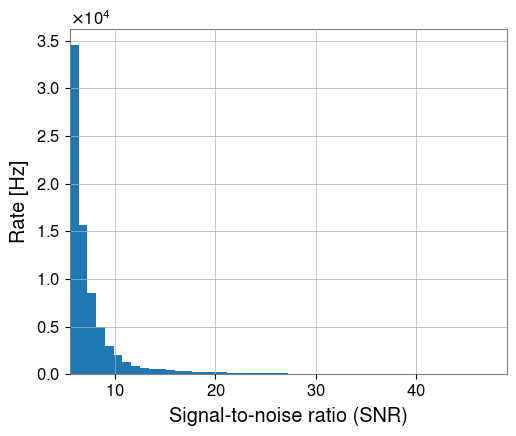

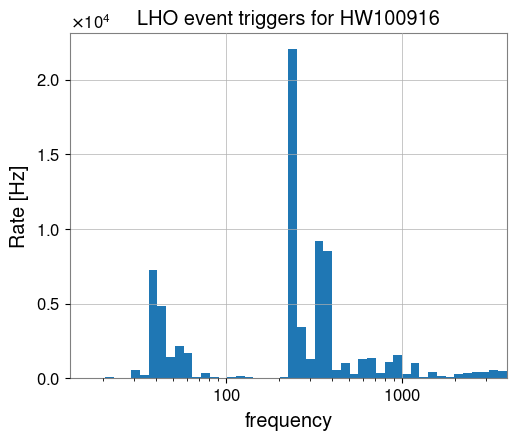

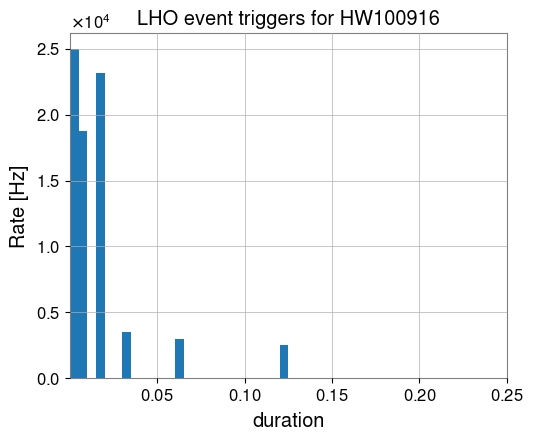

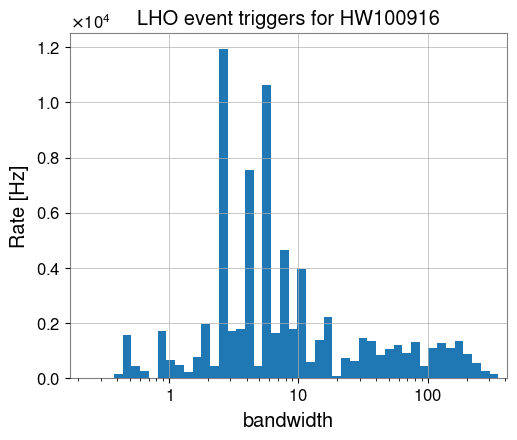

In [21]:
plot = events_v42.hist('snr', bins=50, histtype='stepfilled')
ax = plot.gca()
ax.set_xlabel('Signal-to-noise ratio (SNR)')
ax.set_ylabel('Rate [Hz]')
ax.autoscale(axis='x', tight=True)
plot.show()

plot = events_v42.hist('frequency', logbins=True, bins=50, histtype='stepfilled')
ax = plot.gca()
ax.set_xlabel('frequency')
ax.set_ylabel('Rate [Hz]')
ax.set_title('LHO event triggers for HW100916')
ax.autoscale(axis='x', tight=True)
plot.show()

plot = events_v42.hist('duration', bins=50, histtype='stepfilled')
ax = plot.gca()
ax.set_xlabel('duration')
ax.set_ylabel('Rate [Hz]')
ax.set_title('LHO event triggers for HW100916')
ax.autoscale(axis='x', tight=True)
plot.show()

plot = events_v42.hist('bandwidth', logbins=True, bins=50, histtype='stepfilled')
ax = plot.gca()
ax.set_xlabel('bandwidth')
ax.set_ylabel('Rate [Hz]')
ax.set_title('LHO event triggers for HW100916')
ax.autoscale(axis='x', tight=True)
plot.show()

In [19]:
events512, events128

(<EventTable length=75970>
        time           frequency      ...     bandwidth     
      float64           float64       ...      float64      
 ----------------- ------------------ ... ------------------
 1368965720.039062 287.61368595628875 ...  3.269404730758481
 1368965720.054687 287.61368595628875 ...  3.269404730758481
  1368965720.44934  994.0678740517436 ... 172.74254602338078
 1368965720.449585  994.0678740517436 ... 172.74254602338078
 1368965720.937011 3884.4115620227117 ... 44.155456284579486
 1368965720.937988 3884.4115620227117 ... 44.155456284579486
 1368965720.937988  3928.818696712811 ...  44.66024761866811
 1368965720.938964  3928.818696712811 ...  44.66024761866811
 1368965721.408935  702.5345031918218 ... 122.08180338429213
               ...                ... ...                ...
 1368965593.625244  1028.704529017577 ...  92.58407437744972
 1368965593.625244 1125.5486120622675 ... 101.30010462200221
 1368965593.625366  1182.470265607872 ... 205.481868602680

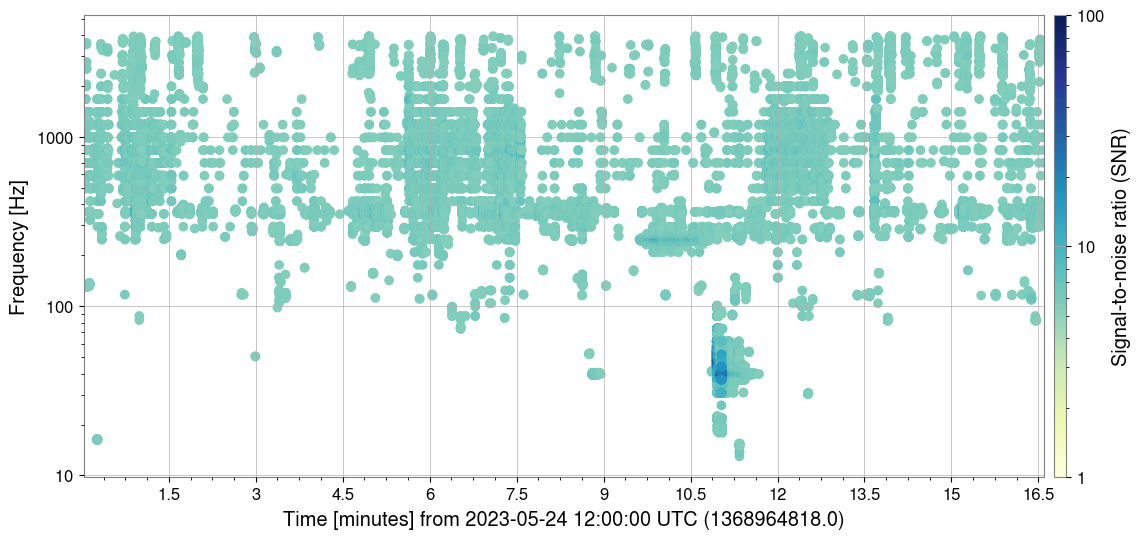

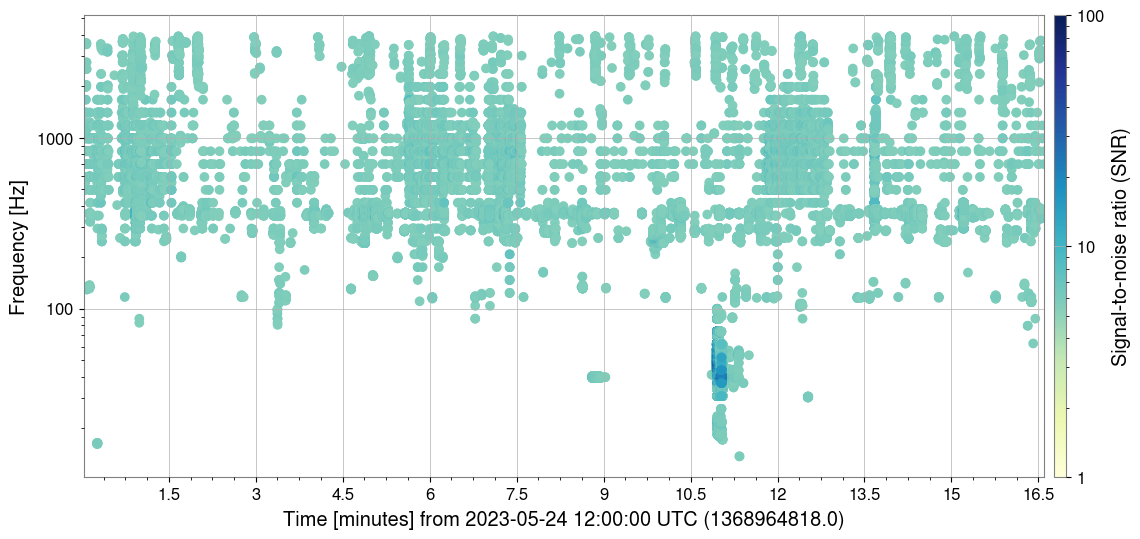

In [20]:
plot = events512.scatter('time', 'frequency', color='snr')
#plot = events.tile('peak_time', 'central_freq', 'duration', 'bandwidth', color='snr')
ax = plot.gca()
#ax.set_epoch('1368964818')
ax.set_yscale('log')
ax.set_ylabel('Frequency [Hz]')
ax.colorbar(clim=[1, 100], cmap='YlGnBu', norm='log', label='Signal-to-noise ratio (SNR)')

plot = events128.scatter('time', 'frequency', color='snr')
ax = plot.gca()
#ax.set_epoch('1368964818')
ax.set_yscale('log')
ax.set_ylabel('Frequency [Hz]')
ax.colorbar(clim=[1, 100], cmap='YlGnBu', norm='log', label='Signal-to-noise ratio (SNR)')